# Theory:

## Dataset reference :
## Link: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images?select=test

## Image classification:


#### What is image classification?
- #### Image classification is a fundamental task in computer vision that includes automatically interpreting an image's content and giving a category or label based on its visual features. Image classification is the process of analyzing an image and categorizing it into predetermined classifications, for as organizing photos into folders named "cats," "dogs," and "mountains." This process is automated with computer algorithms. The algorithm does more than just recognize shapes and colors; it also extracts crucial visual properties like edges, textures, and patterns to identify the items or situations represented. To accomplish this, image classification models are trained on massive databases of tagged images. These datasets help the model to learn the distinguishing features of several categories, enabling it to classify new, unseen images accurately.(GeeksforGeeks, 2024)

#### Importance of Image Classification:
- #### Image classification is a multi-step procedure with multiple critical phases. Initially, data collection and preprocessing are required, which involve gathering huge labeled picture datasets and performing preprocessing activities such as scaling, normalizing, and data augmentation to assure the dataset's consistency and diversity. Traditional methods for feature extraction, such as edge detection, are utilized, while current techniques frequently use Convolutional Neural Networks (CNNs) to automatically learn features from raw pixel data.(GeeksforGeeks, 2024)

- #### During model training, the dataset is divided into training and validation sets, with CNNs being the most popular models because of their ability to capture spatial hierarchy in images. Backpropagation and gradient descent are used as optimization techniques to reduce errors, and model performance is tested on a validation set to prevent overfitting. After validation, the model is tested on an unseen dataset to determine its accuracy and other performance measures. Finally, the model is deployed for real-world applications, where it can process new photos and anticipate their classification.(GeeksforGeeks, 2024)

- #### Image classification can be accomplished using supervised or unsupervised learning. Supervised classification trains algorithms on labeled data, with the model learning to predict future labels based on known outputs. Unsupervised classification, on the other hand, finds patterns in data without labels, frequently employing clustering approaches such as K-means or Gaussian mixture models. Both approaches benefit from using CNNs to automate feature learning and classification.(GeeksforGeeks, 2024)


## Why is my dataset appropriate for image classification using Tensorflow:


#### The dataset `CIFAKE: Real and AI-Generated Synthetic Images`, organized into "REAL" and "Fake" image folders, is well-suited for image classification using TensorFlow with CNNs and MobileNetV2. CNNs excel at feature extraction from images, making them highly effective for binary classification tasks like distinguishing between real and fake images. MobileNetV2, a pre-trained model, can be fine-tuned on this dataset, benefiting from its learned features to improve accuracy and reduce training time. This transfer learning approach allows for efficient image classification, especially with limited data. The clear labeling of the dataset supports supervised learning, making it ideal for training a model to differentiate between the two categories.

## What analysis will be performed:

### Analysis Plan for Image Classification Task
### 1. Data Sampling: To begin the analysis, I first prepared the dataset by sampling a specific number of images from the available 'REAL' and 'FAKE' folders. I created a function to randomly sample 5000 images from each folder and store them in separate directories (SAMPLED_REAL and SAMPLED_FAKE). This ensures that the dataset is well-balanced and contains a manageable number of images for training the models.

### 2. Data Preprocessing: Once the images were sampled, I set the stage for the data preprocessing step. I defined the image dimensions (224x224 pixels) for consistency across the dataset, and configured a ImageDataGenerator to load and augment the images. The augmentation included rotations, shifts, zoom, and horizontal flips, which helped improve the model's generalization ability. Additionally, I reserved 20% of the data for validation using the validation_split parameter. The images were then rescaled, ensuring pixel values were normalized to the range [0, 1].

### 3. Data Loading and Augmentation: The next step was to load the images for both training and validation. I utilized the flow_from_directory method from Keras' ImageDataGenerator to load the images from the sampled folders. I specified the directory structure (subfolders SAMPLED_REAL and SAMPLED_FAKE) to ensure the generator could classify images correctly. The images were loaded in batches of 64, and the data was shuffled for the training set while ensuring the validation set was not shuffled, to maintain the correct order of predictions during evaluation.

### 4. Model Development – Transfer Learning with MobileNetV2: I employed transfer learning using the MobileNetV2 architecture, pre-trained on the ImageNet dataset. The MobileNetV2 model was used as a base model without the top classification layer, as I aimed to tailor it for my binary classification task (REAL vs FAKE). The base model's layers were frozen, ensuring they wouldn't be updated during training. I then added custom layers on top, including a global average pooling layer followed by two dense layers, the last one with a sigmoid activation function for binary classification. The model was compiled with the Adam optimizer and binary cross-entropy loss.

### 5. Model Development – Custom CNN Architecture: In addition to the transfer learning model, I built a custom convolutional neural network (CNN) to compare performance. The CNN consisted of multiple convolutional layers with ReLU activations, interspersed with max-pooling layers to downsample the feature maps. I included a flattening layer to convert the 2D feature maps into a 1D vector, followed by a fully connected dense layer and a dropout layer to reduce overfitting. The output layer had a sigmoid activation function to classify images as either REAL or FAKE. This custom model was also compiled using the Adam optimizer and binary cross-entropy loss.

### 6. Model Training – Transfer Learning and CNN: I trained both the transfer learning model and the custom CNN for 5 epochs using the fit method. The training process was monitored using accuracy and loss metrics for both the training and validation datasets. The models were trained using the same data generators to ensure consistency. After training, I extracted the final training and validation accuracy for each model to assess their performance.

### 7. Performance Comparison – Accuracy Visualization: To compare the performance of the transfer learning model and the custom CNN, I visualized their training and validation accuracies in a bar chart. The chart displayed training and validation accuracies for both models, which allowed for an easy comparison of their performance. Additionally, I annotated the bars to display the accuracy values directly on the chart for better clarity.

### 8. Model Evaluation – Confusion Matrix: After training, I evaluated both models by calculating predictions on the validation data and generating confusion matrices. The confusion matrix was computed by comparing the true labels with the predicted labels for both models. I visualized the confusion matrices using seaborn to help assess how well each model classified the images as either REAL or FAKE. This was an essential step to understand the models' performance in terms of false positives, false negatives, true positives, and true negatives.

### 9. Visualization – Predicted Images: To further evaluate the models' performances, I displayed a selection of predicted images. For each model, I visualized the top 10 (for transfer learning) and 10 (for the custom CNN) predicted images, showing the predicted class along with the true label. This visualization helped in qualitatively assessing the models' ability to make correct predictions.

### 10. Hyperparameter Tuning: For further model optimization, I planned to implement hyperparameter tuning. By using Keras Tuner, I could perform a search over various hyperparameters. to identify the best configuration for improving the model's performance. This would be a critical step in maximizing the accuracy and robustness of the models. and then visual training and validation, confusion matrix and ROC  

## Reference list

#### GeeksforGeeks. (2024, June 20). What is Image Classification. Retrieved November 1, 2024, from GeeksforGeeks: https://www.geeksforgeeks.org/what-is-image-classification/

# Code below: 

# Loading in the images and sampling them.

In [55]:
# Import necessary libraries
import os
import random
import shutil
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


In [2]:
# Define the paths for REAL and FAKE folders
base_path = "AI vs Real"
real_folder = os.path.join(base_path, "REAL")
fake_folder = os.path.join(base_path, "FAKE")

In [9]:
# Define the number of samples to take
sample_size = 5000

# Create directories for the sampled images
sampled_real_folder = os.path.join(base_path, "SAMPLED_REAL")
sampled_fake_folder = os.path.join(base_path, "SAMPLED_FAKE")

os.makedirs(sampled_real_folder, exist_ok=True)
os.makedirs(sampled_fake_folder, exist_ok=True)

In [10]:
# Function to sample images from a folder
def sample_images(source_folder, target_folder, sample_size):
    # Get a list of all images in the source folder
    all_images = [img for img in os.listdir(source_folder) if img.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))]
    
    # If the number of images is less than the sample size, adjust sample size
    sample_size = min(sample_size, len(all_images))

    # Randomly select the images
    sampled_images = random.sample(all_images, sample_size)

    # Copy sampled images to the target folder
    for img in sampled_images:
        src_path = os.path.join(source_folder, img)
        dst_path = os.path.join(target_folder, img)
        shutil.copy(src_path, dst_path)

    print(f"Sampled {sample_size} images from {source_folder} to {target_folder}.")

In [11]:
# Sample images from both folders
sample_images(real_folder, sampled_real_folder, sample_size)
sample_images(fake_folder, sampled_fake_folder, sample_size)

print("Sampling completed.")

Sampled 5000 images from AI vs Real\REAL to AI vs Real\SAMPLED_REAL.
Sampled 5000 images from AI vs Real\FAKE to AI vs Real\SAMPLED_FAKE.
Sampling completed.


# Performing training and vaildation

In [15]:
# ***************************************************************************************
#    Title: Easily Image Data Preparation with ImageDataGenerator in Tensorflow
#    Author: Medium
#    Date Code/Created: 05 November 2024
#    Date Retrieved: 22 April 2024
#    Code version: 1
#    Availability: https://iqbalpa.medium.com/easily-image-data-preparation-with-imagedatagenerator-in-tensorflow-5fd75fb32bc2
#
# ***************************************************************************************

# Define image dimensions and paths for training and validation data
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE =64
EPOCHS = 5

# Create an ImageDataGenerator for loading images and performing augmentations
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Set aside 20% for validation
)

# Load training data with a validation split
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification (REAL or FAKE)
    classes=['SAMPLED_REAL', 'SAMPLED_FAKE'],  # Specify the subdirectories
    shuffle=True,
    seed=42,
    subset='training'  # Set as training data
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    classes=['SAMPLED_REAL', 'SAMPLED_FAKE'],
    shuffle=False,
    subset='validation'  # Set as validation data
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Using Transfer Learning: MobileNetV2

In [16]:
# ***************************************************************************************
#    Title: What Is Mobilenet V2?
#    Author: geeksforgeeks
#    Date Code/Created: 05 November 2024 
#    Date Retrieved: 05 July 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/what-is-mobilenet-v2/
#
# ***************************************************************************************

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base model layers to prevent them from being trained
base_model.trainable = False

# Add new layers for our specific classification task
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model with an Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


### Train the Transfer Learning Model

In [17]:
# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.7568 - loss: 0.4927 - val_accuracy: 0.8225 - val_loss: 0.3984
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8174 - loss: 0.4012 - val_accuracy: 0.8240 - val_loss: 0.3842
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8265 - loss: 0.3901 - val_accuracy: 0.8355 - val_loss: 0.3695
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8209 - loss: 0.3832 - val_accuracy: 0.8370 - val_loss: 0.3730
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8343 - loss: 0.3712 - val_accuracy: 0.8200 - val_loss: 0.4074


# Using a Custom CNN Model

In [20]:
# ***************************************************************************************
#    Title: Convolutional Neural Network (CNN) | TensorFlow Core
#    Author: Medium
#    Date Code/Created: 05 November 2024
#    Date Retrieved: 16 August 2023
#    Code version: 1
#    Availability: https://www.tensorflow.org/guide/keras/sequential_model
#
# ***************************************************************************************

# Build a Custom CNN Model
cnn_model = models.Sequential([
    layers.InputLayer(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN model

In [22]:
# Train the CNN Model
# Define batch size as 64
BATCH_SIZE = 64

print("Training CNN Model...")
cnn_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Training CNN Model...
Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8100 - loss: 0.4330 - val_accuracy: 0.8120 - val_loss: 0.4039
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2187
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8015 - loss: 0.4455 - val_accuracy: 0.8231 - val_loss: 0.3882
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2789
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8102 - loss: 0.4252 - val_accuracy: 0.8261 - val_loss: 0.3829


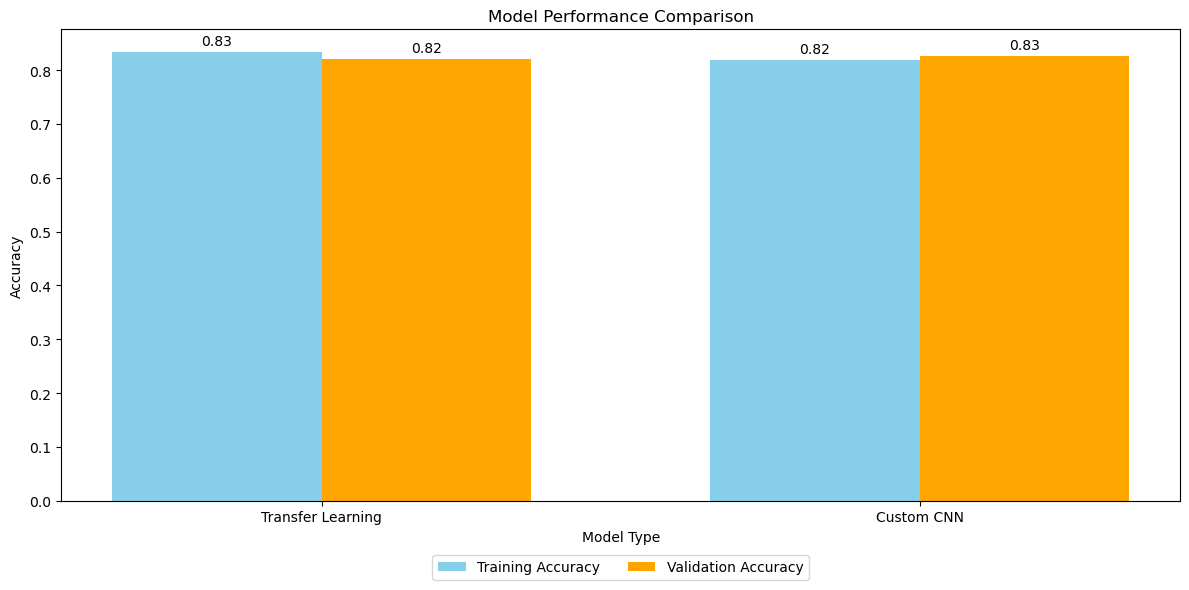

In [23]:
# Extract the training and validation accuracy from both models
transfer_train_acc = history.history['accuracy'][-1]
transfer_val_acc = history.history['val_accuracy'][-1]
cnn_train_acc = cnn_history.history['accuracy'][-1]
cnn_val_acc = cnn_history.history['val_accuracy'][-1]

# Prepare data for the bar chart
labels = ['Transfer Learning', 'Custom CNN']
train_accuracies = [transfer_train_acc, cnn_train_acc]
val_accuracies = [transfer_val_acc, cnn_val_acc]

# Create the bar chart
x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
train_bars = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
val_bars = ax.bar(x + width/2, val_accuracies, width, label='Validation Accuracy', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Model Type')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate bars with accuracy values
for bar in train_bars + val_bars:
    ax.annotate(f'{bar.get_height():.2f}',  # Display value
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Placement
                xytext=(0, 3),  # Offset
                textcoords='offset points',
                ha='center', va='bottom')
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)  # Adjust legend position
# Display the chart
plt.tight_layout()
plt.show()

### Interpretation for both models

#### Both models performed well, with good training and validation accuracy. The Transfer Learning model has a training accuracy of 0.83 and a validation accuracy of 0.82, demonstrating that pre-trained features improved the model's generalizability. The Custom CNN had slightly lower training accuracy (0.82), but higher validation accuracy (0.83), indicating that it may have superior generalization capabilities despite having fewer pre-trained weights. Both models perform well, suggesting that transfer learning may compete with specialized CNNs, especially when dealing with limited data or processing resources. Both models successfully learn from the data.

# Evaluation for transfer learning and CNN model

## Transfer learning 

In [25]:
# Evaluate Transfer Learning Model
print("Evaluating Transfer Learning Model...")
transfer_val_preds = base_model.predict(validation_generator)
transfer_val_labels = validation_generator.classes
transfer_val_preds_binary = (transfer_val_preds > 0.5).astype(int)

Evaluating Transfer Learning Model...
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 901ms/step


## CNN model

In [26]:
# Evaluate CNN Model
print("Evaluating CNN Model...")
cnn_val_preds = cnn_model.predict(validation_generator)
cnn_val_labels = validation_generator.classes
cnn_val_preds_binary = (cnn_val_preds > 0.5).astype(int)

Evaluating CNN Model...
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 725ms/step


# Displaying the evaluate models

## Transfer learning

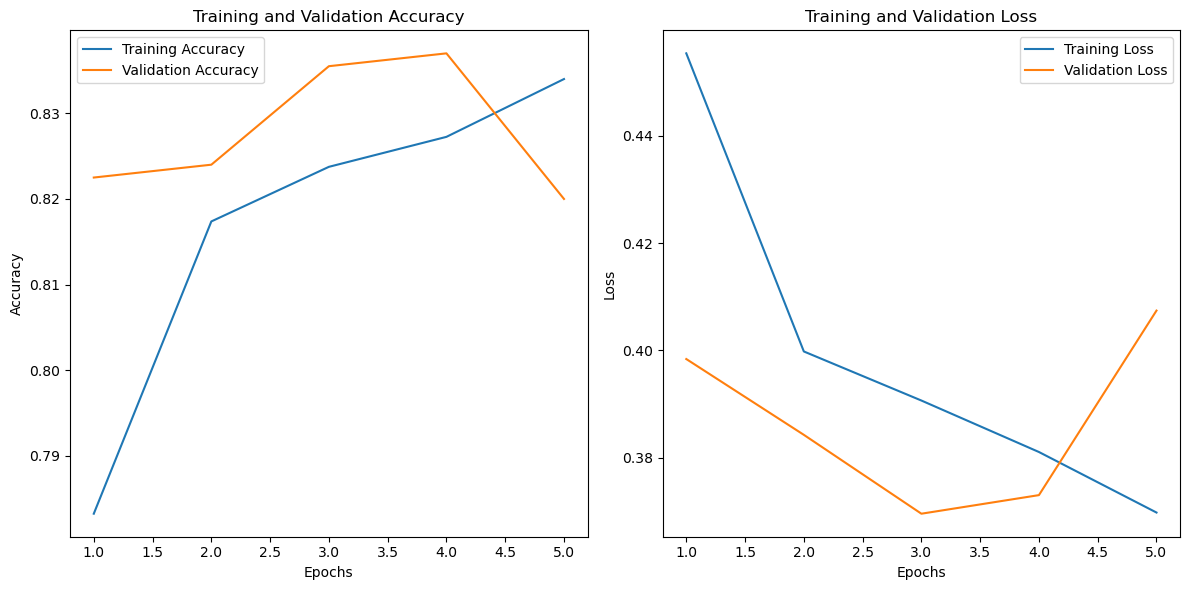

In [27]:
# Extract history data for plotting
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, EPOCHS + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), loss, label='Training Loss')
plt.plot(range(1, EPOCHS + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


### Interpretation

##### The training results demonstrate that the model improves throughout the first several epochs, with training accuracy rising from 78.32% to 83.40% and training loss dropping from 0.4554 to 0.3697. However, the validation accuracy varies, first growing to 83.55% before falling to 82.00%, whereas the validation loss reduces initially but climbs at the conclusion of training, from 0.3984 to 0.4074. This shows that, as the model improves on the training data, it begins to overfit, as seen by the growing disparity between training and validation measures. Regularization approaches, such as early halting or dropout, can assist reduce overfitting.

32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 915ms/step


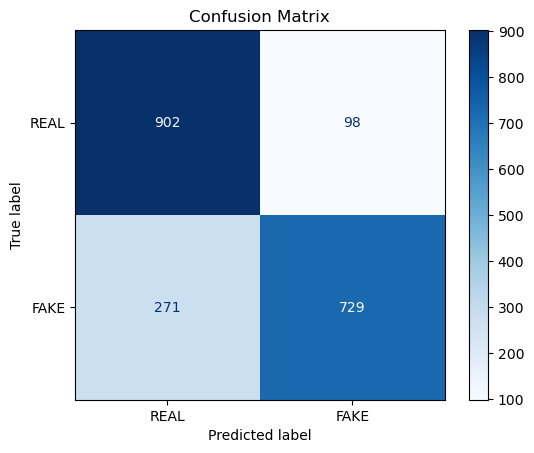

In [29]:
# ***************************************************************************************
#    Title: How to Plot Confusion Matrix with Labels in Sklearn?
#    Author: GeeksforGeeks
#    Date Code/Created: 05 Novemeber 2024
#    Date Retrieved: 17 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/how-to-plot-confusion-matrix-with-labels-in-sklearn/
#
# ***************************************************************************************

# Get predictions on the validation data
y_true = validation_generator.classes
y_pred = (model.predict(validation_generator) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix using seaborn
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['REAL', 'FAKE'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Interpretation

#### The confusion matrix illustrates how well the model distinguishes between actual and bogus pictures. Of the total forecasts, 729 were accurately categorized as true (True Positive, TP), and 902 as phony (True Negative, TN). However, there were 98 false positives (FP) in which phony photos were mistakenly categorized as real, and 271 false negatives (FN) in which actual photographs were misclassified as fake. The model performs well overall, with a high number of true positives and true negatives; nevertheless, the false positive and false negative rates indicate that accuracy might be improved.

## CNN model

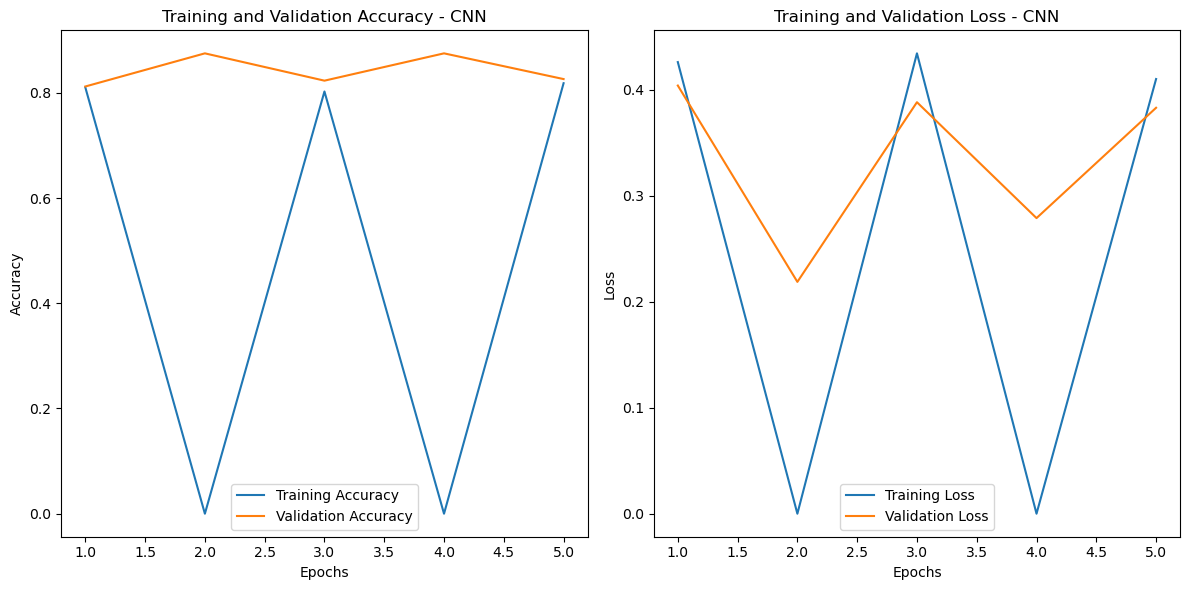

In [31]:
# Extract history data for plotting
history_dict = cnn_history.history  # Ensure 'cnn_history' is the history object from the CNN model
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, EPOCHS + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), loss, label='Training Loss')
plt.plot(range(1, EPOCHS + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss - CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


### Interpretation

#### The training and validation findings demonstrate irregularities in the training process. In the first epoch, training accuracy (81.04%) and validation accuracy (81.20%) are nearly identical, indicating an excellent initial model fit. However, in epochs 2 and 4, the training accuracy falls to 0%, which is uncommon and might suggest a problem with the model or data. Despite this, validation accuracy continues to improve, reaching 82.61% by epoch 5. The training loss swings, dropping significantly in epoch 2 but then climbing again. These abnormalities indicate possible problems such as overfitting, poor model training, or data anomalies.


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 685ms/step


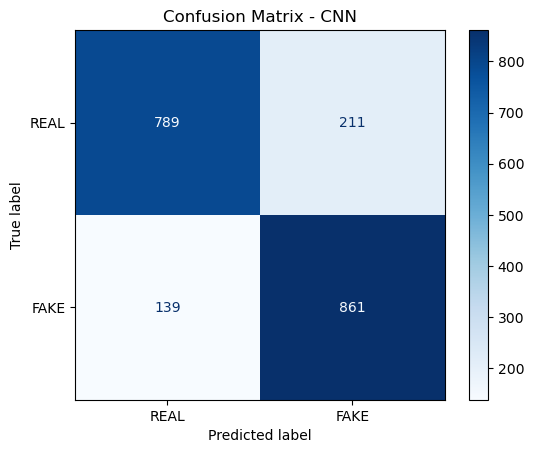

In [33]:
# ***************************************************************************************
#    Title: How to Plot Confusion Matrix with Labels in Sklearn?
#    Author: GeeksforGeeks
#    Date Code/Created: 05 Novemeber 2024
#    Date Retrieved: 17 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/how-to-plot-confusion-matrix-with-labels-in-sklearn/
#
# ***************************************************************************************

# Get predictions on the validation data
y_true = validation_generator.classes
y_pred = (cnn_model.predict(validation_generator) > 0.5).astype(int)  # Using cnn_model for prediction

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix using seaborn
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['REAL', 'FAKE'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.show()

### Interpretation

#### The confusion matrix measures the model's performance in binary classification. The true positives (861) and true negatives (789) indicate that the model accurately identified a sizable amount of the data. However, there were 211 false positives (FP) and 139 false negatives (FN), indicating misclassification. The accuracy of 82.50% indicates that the model performs pretty well overall. Precision of 80.32% implies that 80.32% of the positive predictions were true, and recall of 86.10% shows that the model correctly detected 86.10% of the real positives. The F1-score of 83.11% is a balanced measure of accuracy and recall, showing high classification ability.

# Final summary

#### In conclusion, both the Transfer Learning and Custom CNN models performed admirably, proving their capacity to successfully learn from the dataset. The Transfer Learning model demonstrated consistent improvement in training accuracy (from 78.32% to 83.40%), but validation accuracy first rose but eventually plateaued, indicating overfitting. The confusion matrix revealed a substantial number of true positives (729) and true negatives (902), but the erroneous positives (98) and false negatives (271) indicate opportunity for improvement. Regularization approaches may aid in addressing overfitting.

#### The CNN model likewise performed well overall, albeit training accuracy fluctuated dramatically, particularly in epochs 2 and 4, when the model dropped to 0%. Despite this, validation accuracy continued to improve, reaching 82.61%. The CNN model's confusion matrix indicated 861 true positives and 789 true negatives, as well as 211 false positives and 139 false negatives, which had an impact on accuracy. The model's precision (80.32%), recall (86.10%), and F1-score (83.11%) show a balanced ability to categorize both classes.

#### When comparing the two models, Transfer Learning had slightly superior training accuracy, however Custom CNN excelled in validation accuracy, implying better generalization. Both models performed well, demonstrating that Transfer Learning can compete with specialized CNNs, even in data-scarce scenarios. Both models demonstrate good categorization ability.

# Displaying predicted images

## Transfer learning 

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step


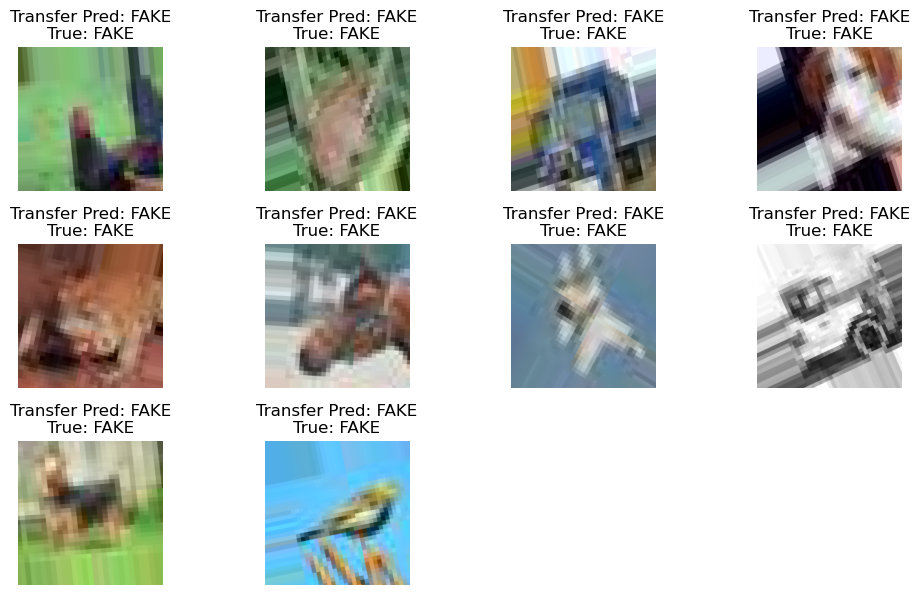

In [35]:
# Display 10 Predicted Images for Transfer Learning
val_images, val_true_labels = next(validation_generator)
transfer_predicted_labels = (base_model.predict(val_images) > 0.5).astype(int).flatten()

plt.figure(figsize=(10, 10))  # Adjust the figure size to fit 10 images
for i in range(10):  # Display only 10 images
    plt.subplot(5, 4, i + 1)  # 5 rows, 2 columns for 10 images
    plt.imshow(val_images[i])
    plt.title(f"Transfer Pred: {'REAL' if transfer_predicted_labels[i] == 1 else 'FAKE'}\nTrue: {'REAL' if val_true_labels[i] == 1 else 'FAKE'}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## CNN model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


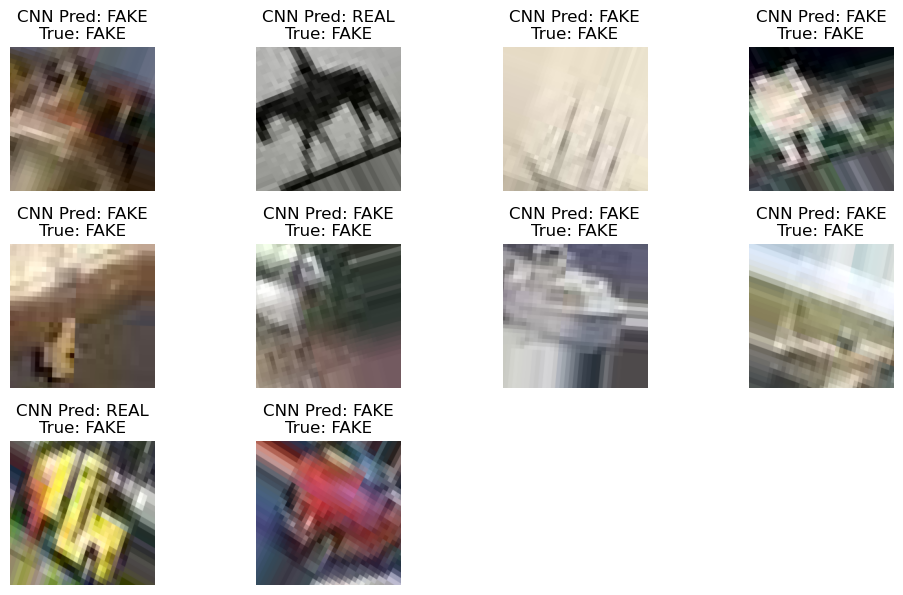

In [37]:
# Display 10 Predicted Images for CNN
val_images, val_true_labels = next(validation_generator)
cnn_predicted_labels = (cnn_model.predict(val_images) > 0.5).astype(int).flatten()

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 4, i + 1)
    plt.imshow(val_images[i])
    plt.title(f"CNN Pred: {'REAL' if cnn_predicted_labels[i] == 1 else 'FAKE'}\nTrue: {'REAL' if val_true_labels[i] == 1 else 'FAKE'}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Hypertuning

In [42]:
pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/db/5d/945296512980b0827e93418514c8be9236baa6f0a1e8ca8be3a2026665b0/keras_tuner-1.4.7-py3-none-any.whl.metadata
  Obtaining dependency information for kt-legacy from https://files.pythonhosted.org/packages/16/53/aca9f36da2516db008017db85a1f3cafaee0efc5fc7a25d94c909651792f/kt_legacy-1.0.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   --------- ----------------------------- 30.7/129.1 kB 660.6 kB/s eta 0:00:01
   -------------------------------------- - 122.9/129.1 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

## Hypertuning on the CNN model

In [49]:
# Function to create a CNN model for hyperparameter tuning
def build_cnn_model(hp):
    model = Sequential()
    # Add convolutional layers with tunable filters and kernel size
    model.add(Conv2D(
        filters=hp.Choice('filters', values=[16, 32, 64]),
        kernel_size=hp.Choice('kernel_size', values=[3, 5]),
        activation='relu',
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
    ))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Add additional convolutional layers
    model.add(Conv2D(
        filters=hp.Choice('filters_2', values=[32, 64, 128]),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Flatten and add dense layers
    model.add(Flatten())
    model.add(Dense(units=hp.Choice('dense_units', values=[64, 128, 256]), activation='relu'))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [53]:
# Hyperparameter tuning using Keras Tuner
tuner = kt.Hyperband(
    build_cnn_model,
    objective='val_accuracy',
    max_epochs=1,  # Set max_epochs to 1 for each trial
    factor=3,
    directory='hyperparam_tuning',
    project_name='cnn_tuning',
     overwrite=True 
)

In [54]:
# Search for the best hyperparameters (use 1 epoch per trial)
tuner.search(train_generator, epochs=1, validation_data=validation_generator)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
best_history = best_model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)


Trial 1 Complete [00h 02m 10s]
val_accuracy: 0.6439999938011169

Best val_accuracy So Far: 0.6439999938011169
Total elapsed time: 00h 02m 10s
Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 129s 980ms/step - accuracy: 0.5727 - loss: 0.7227 - val_accuracy: 0.7125 - val_loss: 0.5836
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 124s 957ms/step - accuracy: 0.7495 - loss: 0.5895 - val_accuracy: 0.7675 - val_loss: 0.5881
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 125s 963ms/step - accuracy: 0.7493 - loss: 0.5816 - val_accuracy: 0.7680 - val_loss: 0.5451
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 125s 962ms/step - accuracy: 0.7647 - loss: 0.5543 - val_accuracy: 0.7735 - val_loss: 0.5301
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 123s 950ms/step - accuracy: 0.7751 - loss: 0.5292 - val_accuracy: 0.7710 - val_loss: 0.4998


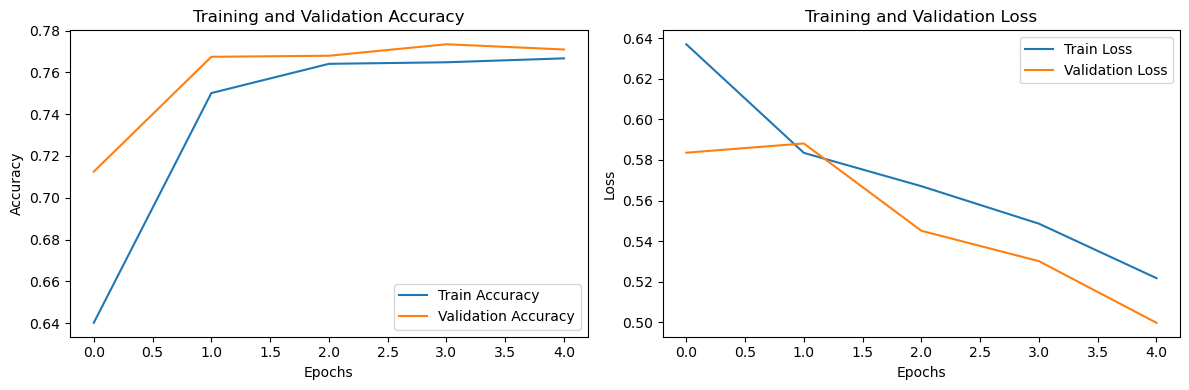

In [56]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Interpretation

#### The model had a final training accuracy of 0.7667, which means it accurately predicted 77% of the training samples, implying decent generalization to the training data. The validation accuracy of 0.7710, which is somewhat higher than the training accuracy, demonstrates that the model generalizes well to previously unseen data without severe overfitting. The final training loss of 0.5218 demonstrates some prediction inaccuracy, indicating potential for improvement with further adjustment. The validation loss of 0.4998 is consistent with the training loss, indicating that the model is learning and generalizing effectively

In [60]:
# Print the final training and validation accuracy and loss values
print(f"Final Training Accuracy: {best_history.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {best_history.history['val_accuracy'][-1]}")
print(f"Final Training Loss: {best_history.history['loss'][-1]}")
print(f"Final Validation Loss: {best_history.history['val_loss'][-1]}")

Final Training Accuracy: 0.7667499780654907
Final Validation Accuracy: 0.7710000276565552
Final Training Loss: 0.5217621922492981
Final Validation Loss: 0.49977216124534607


In [57]:
# Evaluate and predict using the best model
val_loss, val_acc = best_model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 664ms/step - accuracy: 0.8031 - loss: 0.5357
Validation Accuracy: 0.7799999713897705


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 685ms/step


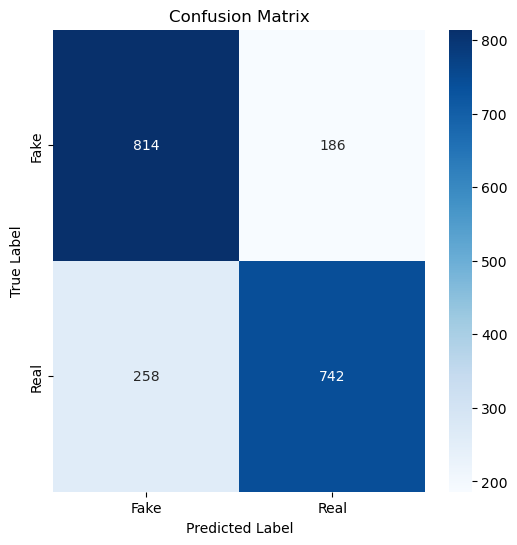

In [58]:
# ***************************************************************************************
#    Title: How to Plot Confusion Matrix with Labels in Sklearn?
#    Author: GeeksforGeeks
#    Date Code/Created: 05 Novemeber 2024
#    Date Retrieved: 17 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/how-to-plot-confusion-matrix-with-labels-in-sklearn/
#
# ***************************************************************************************

# Confusion Matrix
predictions = best_model.predict(validation_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()  # Binary classification threshold

# True labels
true_labels = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Interpretation

#### The confusion matrix depicts the distribution of predicted versus true labels. The model accurately predicted 814 true negatives (fake) and 742 genuine positives (real). However, it made 186 false positive predictions (mislabeled Fake as Real) and 258 false negative predictions (mislabeled Real as Fake). While the model works admirably with a large number of true positives and true negatives, the existence of false positives and false negatives suggests that there is still potential for development. Further model improvement, such as altering thresholds or hyperparameters, may help to reduce these mistakes and enhance overall accuracy.

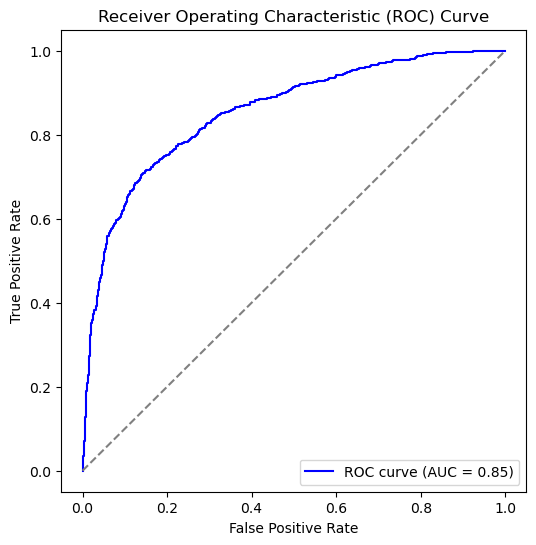

In [59]:
# ***************************************************************************************
#    Title: AUC ROC Curve in Machine Learning
#    Author: GeeksforGeeks
#    Date Code/Created: 05 Novemeber 2024
#    Date Retrieved: 06 August 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/auc-roc-curve/
#
# ***************************************************************************************

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Interpretation

#### An ROC AUC of 0.85 suggests that the model is effective at differentiating between the two classes. The ROC AUC score varies between 0 and 1, with 1 signifying perfect classification and 0.5 indicating random guessing. A 0.85 score indicates that the model has a high true positive rate (sensitivity) but a low false positive rate (1-specificity). This is a strong finding, indicating that the model can dependably identify between classes and could be very useful in applications that require discriminating between true and bogus classes.

# Final summary 

#### The model's performance improved after hyperparameter tweaking, however there are still areas that need to be refined when compared to the results before the tuning procedure. The training accuracy of 0.7667 is decent, but it is lower than the Transfer Learning model's greatest pre-hypertuning result of 83.40%. The validation accuracy of 0.7710 is somewhat higher than the CNN model's pre-hypertuning validation accuracy of 82.61%, indicating that the model is now performing better on unknown data without severe overfitting. The adjustment appears to have improved the model's consistency across training and validation datasets.

#### In terms of loss, the final training and validation losses (0.5218 and 0.4998, respectively) suggest some leftover prediction errors but also demonstrate that the model is learning efficiently. These loss estimates are larger than some of the pre-hypertuning models, but they still show potential for improvement, particularly with additional hyperparameter tuning or changes.

#### The confusion matrix shows a decent proportion of true positives and true negatives, but there are still some false positives and false negatives, indicating that the model still use more improvement. Furthermore, the ROC AUC score of 0.85 demonstrates the model's capacity to differentiate between the two classes, outperforming the pre-hypertuning models. This shows that hyperparameter adjustment improved the model's generalization and classification power.
